# Working with complicated dataset

Your name: Anton Clayton



### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [166]:
### Your code here . . .
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read only header row (still ignoring the # comments)
header_df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv', comment='#', nrows=0)
# extract column names
header_string = header_df.columns[0]
header = header_string.replace("# Fields: ","").split(", ")
print(header)

# read data with extracted header
blast_df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv', comment='#', names=header, skiprows=7, usecols=header)
blast_df.head()
blast_df.drop(columns='query acc.ver', inplace=True)
blast_df.set_index('subject acc.ver', inplace=True)
blast_df.head()


# Manually handling column names
# results_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

# manually handling the column names because python because ""# Fields:" heading is difficult to change into column names
# columns = ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score", "% positives", "bonds", "publications"]
# blast_df = pd.read_csv(results_url, comment="#", names=columns, skiprows=7, usecols=columns)

# blast_df.drop(columns='query acc.ver', inplace=True)
# blast_df.set_index('subject acc.ver', inplace=True)
# blast_df.head()

['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives', 'bonds', 'publications']


% identity  alignment length  mismatches  gap opens  \
subject acc.ver                                                        
NP_904328.1         100.000               318           0          0   
AGK29621.1           99.686               318           1          0   
YP_220563.1          99.686               318           1          0   
ACM24502.1           99.686               318           1          0   
AHG32084.1           99.371               318           2          0   

                 q. start  q. end  s. start  s. end  evalue  bit score  \
subject acc.ver                                                          
NP_904328.1             1     318         1     318       0        629   
AGK29621.1              1     318         1     318       0        629   
YP_220563.1             1     318         1     318       0        627   
ACM24502.1              1     318         1     318       0        627   
AHG32084.1              1     318         1     318       0        627   

                 % positives     bonds publications  
subject acc.ver                                      
NP_904328.1           100.00    1,487             9  
AGK29621.1            100.00   17,947            47  
YP_220563.1           100.00   12,106            13  
ACM24502.1             99.69    2,319            41  
AHG32084.1            100.00   18,964             3

### Question 2
What is the average number of publications?

In [167]:
### Your code here . . .

# some of the publication data points are "-" so replace those with NaN with errors='coerce'
average_publications = pd.to_numeric(blast_df['publications'], errors='coerce')
average_publications.mean()


26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [168]:
# ### Your code here . . .

# replace commas in bond nums
blast_df['bonds'] = pd.to_numeric(blast_df['bonds'].str.replace(',', ''), errors='coerce')
blast_df.head()

over_15k_bonds = blast_df[blast_df['bonds'] > 15000].index
print(over_15k_bonds)

Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

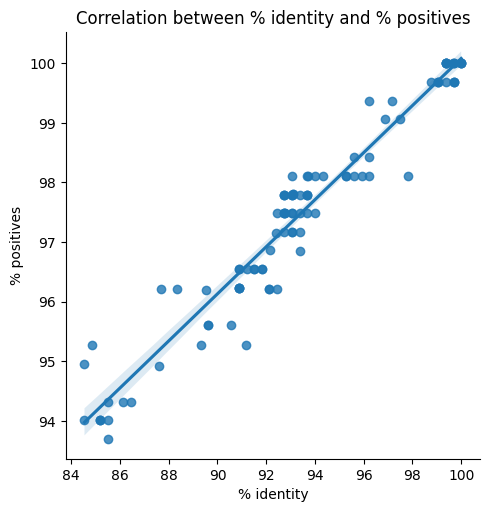

In [169]:
### Your code here . . .
sns.lmplot(x='% identity', y='% positives', data=blast_df)
plt.title('Correlation between % identity and % positives')
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [170]:
### Your code here . . .
protein_df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv')

# protein_df contains an unnamed row so it should be dropped
protein_df.drop(columns='Unnamed: 0', inplace=True)
protein_df.head()

# merge with blast_df
# merged_df = blast_df.merge(protein_df, left_index=True, right_on='Protein')
# merged_df

# merge df with join key of subject acc.ver (index) and protein
blast_df = pd.merge(blast_df, protein_df, left_index=True, right_on='Protein', how='left')

blast_df['Source'] = blast_df['Source'].fillna('NA')
blast_df




% identity  alignment length  mismatches  gap opens  q. start  q. end  \
0.0      100.000               318           0          0         1     318   
NaN       99.686               318           1          0         1     318   
1.0       99.686               318           1          0         1     318   
NaN       99.686               318           1          0         1     318   
NaN       99.371               318           2          0         1     318   
...          ...               ...         ...        ...       ...     ...   
NaN       92.767               318          23          0         1     318   
NaN       93.375               317          21          0         1     317   
62.0      84.543               317          49          0         1     317   
63.0      85.174               317          47          0         1     317   
NaN       92.744               317          23          0         1     317   

      s. start  s. end  evalue  bit score  % positives  bonds publications  \
0.0          1     318       0        629       100.00   1487            9   
NaN          1     318       0        629       100.00  17947           47   
1.0          1     318       0        627       100.00  12106           13   
NaN          1     318       0        627        99.69   2319           41   
NaN          1     318       0        627       100.00  18964            3   
...        ...     ...     ...        ...          ...    ...          ...   
NaN          1     318       0        551        97.48  17348            6   
NaN          1     317       0        551        96.85   7105           19   
62.0         1     317       0        551        94.01  18940           37   
63.0         1     317       0        551        94.01  18762            5   
NaN          1     317       0        551        97.79   3209           32   

             Protein   Source  
0.0      NP_904328.1   RefSeq  
NaN       AGK29621.1       NA  
1.0      YP_220563.1  GenPept  
NaN       ACM24502.1       NA  
NaN       AHG32084.1       NA  
...              ...      ...  
NaN       ABX45285.1       NA  
NaN       ASP44815.1       NA  
62.0  YP_009414156.1  GenPept  
63.0  YP_009414363.1  GenPept  
NaN       AGS12808.1       NA  

[100 rows x 15 columns]